### 3-1．데이터의 이해
#### 데이터 리드

In [12]:
# Pandas의 로드
import pandas as pd

# 파일을 리드
bank_df = pd.read_csv('./bank.csv', sep=',')

# 데이터의 앞에 () 안의 개수만큼 출력
# default = 5 
bank_df.head()

age          job  marital  education default  balance housing loan contact  \
0   58   management  married   tertiary      no     2143     yes   no     NaN   
1   36   technician   single  secondary      no      265     yes  yes     NaN   
2   25  blue-collar  married  secondary      no       -7     yes   no     NaN   
3   53   technician  married  secondary      no       -3      no   no     NaN   
4   24   technician   single  secondary      no     -103     yes  yes     NaN   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0      NaN  no  
1    5   may       348         1     -1         0      NaN  no  
2    5   may       365         1     -1         0      NaN  no  
3    5   may      1666         1     -1         0      NaN  no  
4    5   may       145         1     -1         0      NaN  no

In [3]:
# 데이터의 앞에 () 안의 개수만큼 출력
# default = 5 
bank_df.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

In [4]:
# 데이터의 행수, 열수를 확인
print(bank_df.shape)

(891, 12)


In [5]:
# 데이터 형을 확인
print(bank_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 결손값의 확인

In [6]:
# 데이터행에 결손값이 포함되어 있는가?
print(bank_df.isnull().any(axis=1)) # axis = 1 : 행

# 데이터열에 결소값이 포함되어 있는가?
print(bank_df.isnull().any(axis=0)) # axis = 0 : 열

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [7]:
# 데이터행별 결손값의 갯수
print(bank_df.isnull().sum(axis=1))

# 데이터열별 결손값의 갯수
print(bank_df.isnull().sum(axis=0))

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# 연습문제2
# 데이터행별 결손값의 갯수
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))

502    2
773    2
517    2
783    2
359    2
      ..
659    0
662    0
438    0
215    0
445    0
Length: 891, dtype: int64


### 통계량의 계산

In [9]:
# 데이터형이 수치인 각종 통계량의 계산
bank_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
# 연습문제3
# 데이터형이 문자열인 각종 통계량의 계산
bank_df.describe(include=[object])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

### 데이터의 가시화１

In [11]:
# Matplotlib의 로드
import matplotlib.pyplot as plt
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것.
%matplotlib inline



# age의 히스토그램을 작성
plt.hist(bank_df['age'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

KeyError: 'age'

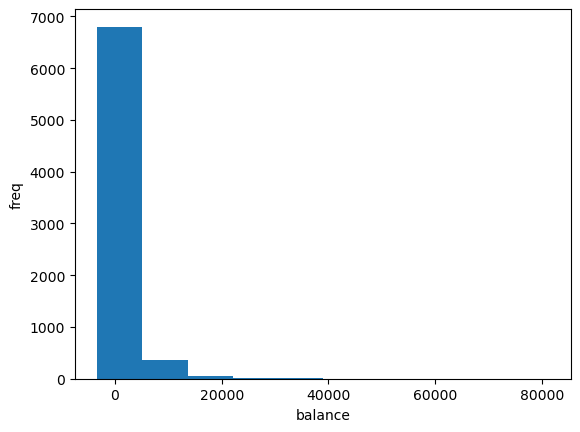

In [ ]:
# 연습문제4
# balance의 히스토그램
plt.hist(bank_df['balance'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

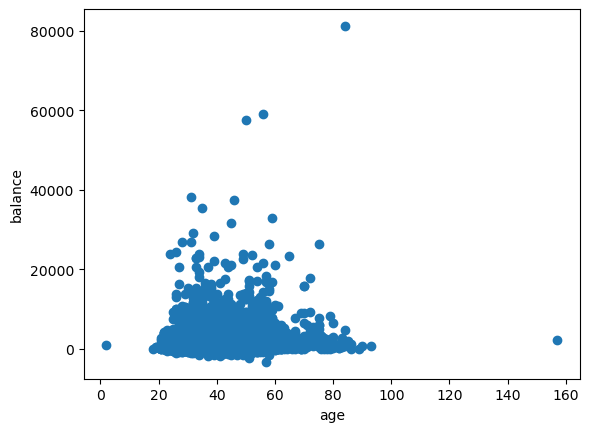

              age   balance
age      1.000000  0.112364
balance  0.112364  1.000000


In [ ]:
# age와 balance의 산포도를 작성
# plt.scatter는 산점도를 그려주는 함수
plt.scatter(bank_df['age'], bank_df['balance'])

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

# age와 balance의 상관계수
# 등간척도 : 관찰대상의 속성을 상대적인 크기로 나타내는것
# 상관계수 : 등간척도 이상의 두 변수 중에서 한 변수의 변화가 다른 변수의 변화에 따라 어떤 변화가 일어나는지를 보여주는 지표
print(bank_df[['age', 'balance']].corr())

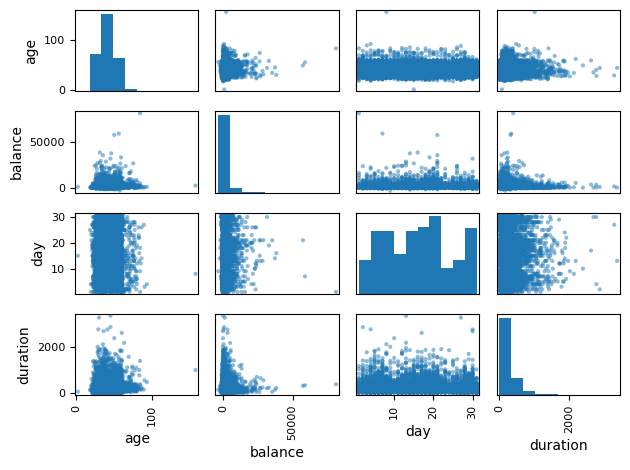

In [ ]:
# 연습문제5
# 산포도행렬의 작성
pd.plotting.scatter_matrix(bank_df[['age','balance','day','duration']]) # ? 
plt.tight_layout()
plt.show()

In [ ]:
# job값의 비율을 계산
print(bank_df['job'].value_counts(ascending=False, normalize=True))

# ascending = False 내림차순 (True: 오름차순)
# normalize=True 상대적 비율 (데이터 값이 차지하는 비율)


management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


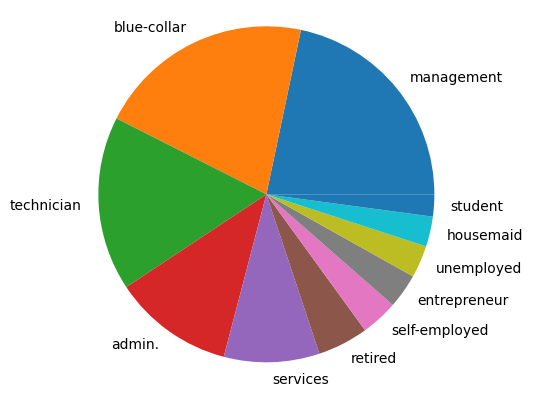

In [ ]:
# job값의 레이블
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
# job의 값
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

# job의 원그래프를 작성
plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

married     0.600359
single      0.284766
divorced    0.114874
Name: marital, dtype: float64


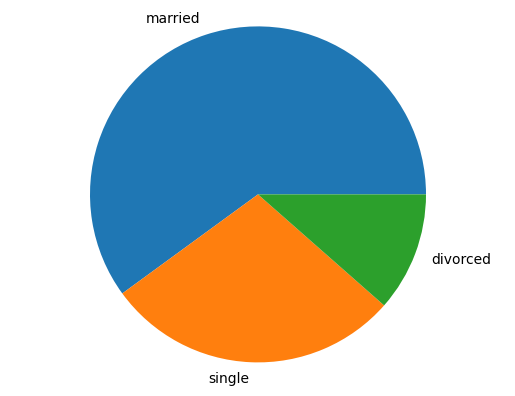

In [ ]:
# 연습문제6
# marital값의 비율을 계산
print(bank_df['marital'].value_counts(ascending=False, normalize=True))

# marital값의 레이블
marital_label = bank_df['marital'].value_counts(ascending=False, normalize=True).index
# martial의 값
marital_vals = bank_df['marital'].value_counts(ascending=False, normalize=True).values

# marital의 원 그래프를 작성
plt.pie(marital_vals, labels=marital_label)
plt.axis('equal')
plt.show()

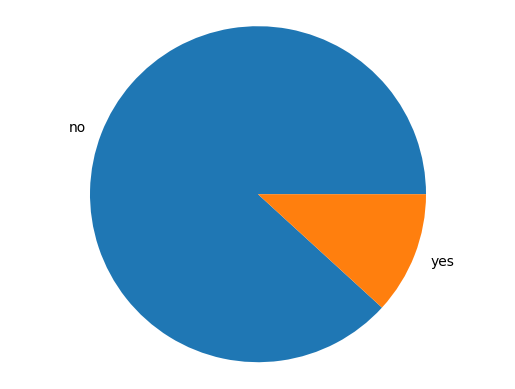

In [ ]:
# y값의 레이블
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
# y의 값
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

# y의 원 그래프를 작성
plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

### 데이터의 가시화2

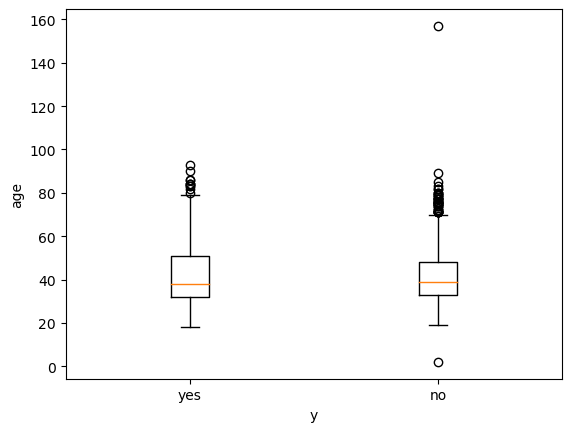

In [ ]:
# y가 yes나 no일때의 age데이터를 추출
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
# yes와 no의 데이터를 정리
y_age = [y_yes['age'], y_no['age']]

# 박스수염 플롯의 작성
plt.boxplot(y_age)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
# y축 （종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

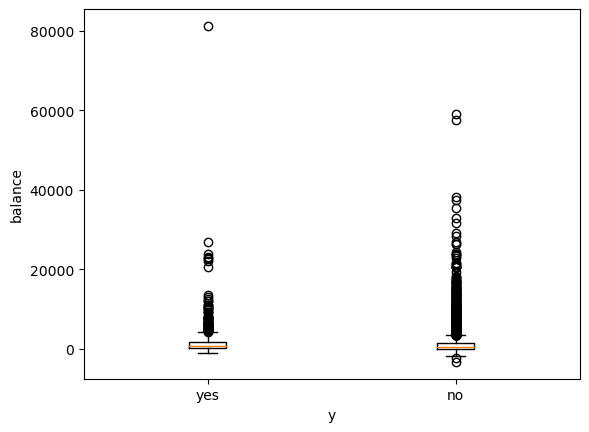

In [ ]:
# 연습문제7
# yes와 no의 데이터를 정리
y_balance = [y_yes['balance'], y_no['balance']]

# 박스수염 플롯의 작성
plt.boxplot(y_balance)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('balance')
ax = plt.gca()
# y축（종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

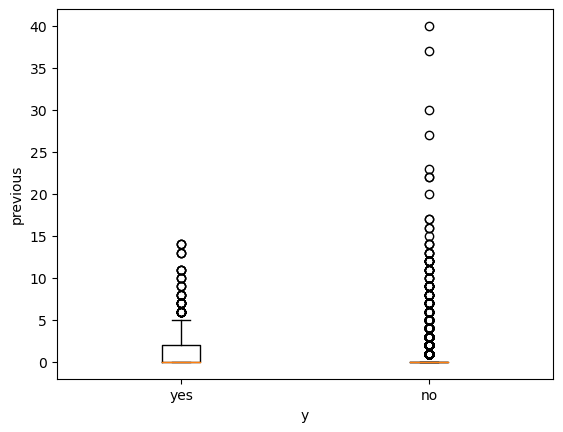

In [ ]:
# 연습문제7
# yes와 no의 데이터를 정리
y_previous = [y_yes['previous'], y_no['previous']]

# 박스수염 플롯의 작성
plt.boxplot(y_previous)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('previous')
ax = plt.gca()
# y축（종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()